In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import tensorflow as tf
import sklearn
import random

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import dataset
url = 'https://drive.google.com/file/d/19RJkvliZAL5Tx6qS58nwyv9quuJVw_ob/view'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
df_heart = pd.read_csv(dwn_url)

# EDA (EKSPLORATORY DATA ANALYSIS)

In [ ]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


1. **id**: Nomor identifikasi unik untuk setiap pasien.
2. **age**: Usia pasien dalam tahun.
3. **sex**: Jenis kelamin pasien (Male/Female).
4. **dataset**: Asal dataset atau sumber data (misalnya "Cleveland").
5. **cp:** Jenis nyeri dada yang dialami oleh pasien (contoh: "typical angina", "atypical angina").
6. **trestbps**: Tekanan darah saat istirahat (mm Hg).
7. **chol**: Kadar kolesterol serum dalam mg/dl.
8. **fbs**: Gula darah puasa (> 120 mg/dl, "True" jika lebih besar dari 120 mg/dl, sebaliknya "False").
9. **restecg**: Hasil elektrokardiografi saat istirahat (misalnya "normal", "lv hypertrophy").
10. **thalch**: Denyut jantung maksimal yang dicapai selama tes.
11. **exang**: Angina yang diinduksi oleh latihan fisik ("True" jika ada, "False" jika tidak).
12. **oldpeak**: Depresi ST yang diukur selama latihan relatif terhadap saat istirahat.
13. **slope**: Kemiringan segmen ST selama latihan (misalnya "upsloping", "flat").
14. **ca**: Jumlah pembuluh darah utama yang diwarnai oleh fluoroskopi (nilai numerik).
15. **thal**: Hasil tes thallium ("normal", "fixed defect", "reversable defect").
16. ***num***: Diagnosis penyakit jantung (0 = tidak ada, 1, 2, 3, 4 = tingkat keparahan penyakit).

In [ ]:
df_heart.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
print('Total rows:', df_heart.shape[0])
print('Total features:', df_heart.shape[1])

Total rows: 920
Total features: 16


In [ ]:
# Missing values count
missing_values = df_heart.isnull().sum()

# Percentage of missing values
missing_percentage = (missing_values / len(df_heart)) * 100

# Concatenate the count and percentage of missing values
missing_data = pd.concat([missing_values, missing_percentage], axis=1, keys=['Missing Values', 'Percentage'])
missing_data[missing_data['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)

,Missing Values,Percentage
ca,611,66.413043
thal,486,52.826087
slope,309,33.586957
fbs,90,9.782609
oldpeak,62,6.739130
trestbps,59,6.413043
thalch,55,5.978261
exang,55,5.978261
chol,30,3.260870
restecg,2,0.217391


In [ ]:
# 2. Descriptive Statistics
df_heart.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


## Drop Column

In [ ]:
# Drop kolom 'id'
df_heart = df_heart.drop('id', axis=1)
df_heart.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Checking Outlier

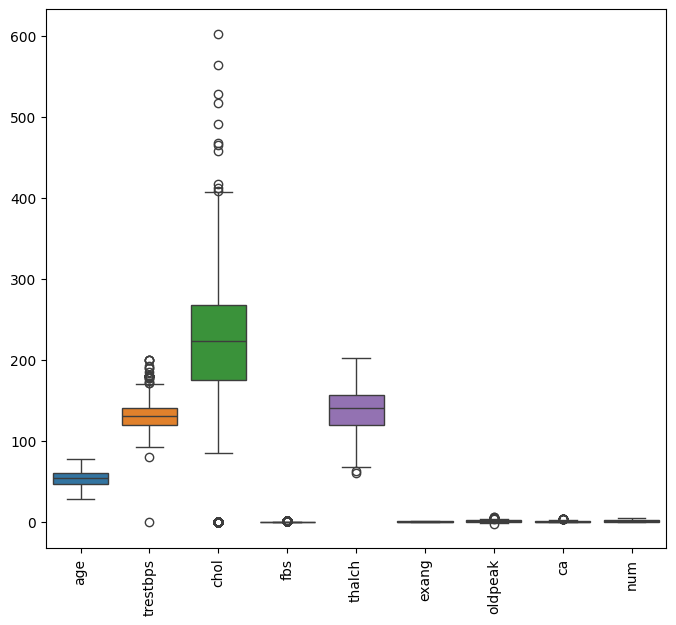

In [ ]:
# Create a box plot for numerical columns
plt.figure(figsize=(8,7))
sns.boxplot(data=df_heart)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Dataset Split

Berdasarkan Analisis terlihat bahwa dataset

*   Memiliki missing value
*   Memiliki outlier
*   Memiliki data ketegorikal
*   Tidak seimbang

In [ ]:
from sklearn.model_selection import train_test_split
# Split dataset menjadi dataset train dan dataset test
df_heart_train, df_heart_test = train_test_split(df_heart, test_size = 0.2, random_state = 42, stratify=df_heart['num'])

# Reset index
df_heart_train = df_heart_train.reset_index(drop=True)
df_heart_test = df_heart_test.reset_index(drop=True)

In [ ]:
# Mencek jumlah kelas di setiap split dataset
df_heart_count = pd.concat([df_heart_train['num'].value_counts(),
                           df_heart_test['num'].value_counts()],
                           axis=1,
                           keys=['train', 'test'])
df_heart_count

,train,test
num,,
0,329,82
1,212,53
2,87,22
3,86,21
4,22,6


# Preprocessing

# Handling Missing Value

In [ ]:
missing_cols = df_heart.columns[df_heart.isnull().any()]
numerical_cols = df_heart.select_dtypes(include=['number']).columns
categorical_cols = df_heart.select_dtypes(include=['object']).columns

# Fitur numerik dengan missing value
missing_numerical = missing_cols.intersection(numerical_cols)
# Fitur kategorikal dengan missing value
missing_categorical = missing_cols.intersection(categorical_cols)

In [ ]:
class FILL_MISSING():
  def __init__(self, features, target, kind):
    self.features = features
    self.target = target
    self.kind = kind
    self.statistic = {}

  def fit(self, df_heart_train):
    # Mencari kelas unik
    self.classes = df_heart_train[self.target].unique()

    # Mencari nilai median untuk setiap fitur pada kelas tertentu
    for feature in self.features:
      self.statistic[feature] = {}
      for cls in self.classes:
        index = df_heart_train[self.target] == cls
        if self.kind == 'median':
          self.statistic[feature][cls] = df_heart_train[feature][index].median()
        elif self.kind == 'mode':
          self.statistic[feature][cls] = df_heart_train[feature][index].mode().iloc[0]

  def transform(self, df_heart):
    df_heart_fill = df_heart.copy()

    # Mengganti nilai NaN dengan median
    for feature in self.features:
      for cls in self.classes:
        index = df_heart_fill[self.target] == cls
        df_heart_fill[feature][index] = df_heart_fill[feature][index].fillna(self.statistic[feature][cls])

    return df_heart_fill

In [ ]:
filler_num = FILL_MISSING(features=missing_numerical, target='num', kind='median')
filler_cat = FILL_MISSING(features=missing_categorical, target='num', kind='mode')

filler_num.fit(df_heart_train)
filler_cat.fit(df_heart_train)

df_heart_train = filler_num.transform(df_heart_train)
df_heart_test = filler_num.transform(df_heart_test)

df_heart_train = filler_cat.transform(df_heart_train)
df_heart_test = filler_cat.transform(df_heart_test)

In [ ]:
# Concatenate jumlah missing value dan persentasenya
missing_data = pd.concat([df_heart_train.isnull().sum(),
                          df_heart_test.isnull().sum()],
                          axis=1,
                          keys=['Train', 'Test'])
missing_data

,Train,Test
age,0,0
sex,0,0
dataset,0,0
cp,0,0
trestbps,0,0
chol,0,0
fbs,0,0
restecg,0,0
thalch,0,0
exang,0,0


# Outlier Detection

In [ ]:
class OUTLIER_DETECTION():
  def __init__(self, features):
    self.features = features
    self.limit = {}

  def fit(self, df_heart_train):

    for feature in self.features:
      self.limit[feature] = {}

      # Mencari IQR
      percentile25 = df_heart_train[feature].quantile(0.25)
      percentile75 = df_heart_train[feature].quantile(0.75)
      iqr = percentile75 - percentile25

      # Mencari upper limit dan lower limit
      self.limit[feature]['upper'] = percentile75 + 1.5 * iqr
      self.limit[feature]['lower'] = percentile25 - 1.5 * iqr

  def transform(self, df_heart):
    df_heart_cap = df_heart.copy()

    for feature in self.features:
      df_heart_cap[feature] = np.where(
        df_heart_cap[feature] > self.limit[feature]['upper'],
        self.limit[feature]['upper'],
        np.where(
            df_heart_cap[feature] < self.limit[feature]['lower'],
            self.limit[feature]['lower'],
            df_heart_cap[feature]
        )
      )

    return df_heart_cap

In [ ]:
detector = OUTLIER_DETECTION(features=['chol', 'trestbps'])
detector.fit(df_heart_train)
df_heart_train = detector.transform(df_heart_train)
df_heart_test = detector.transform(df_heart_test)

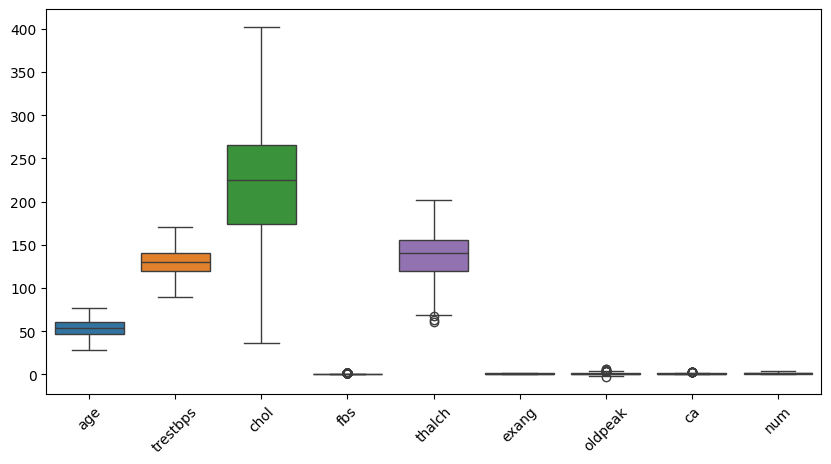

In [ ]:
# Box plot
plt.figure(figsize = (10, 5))
plt.xticks(rotation=45)
sns.boxplot(df_heart_train)
plt.show()

# Data Exploratory Analysis

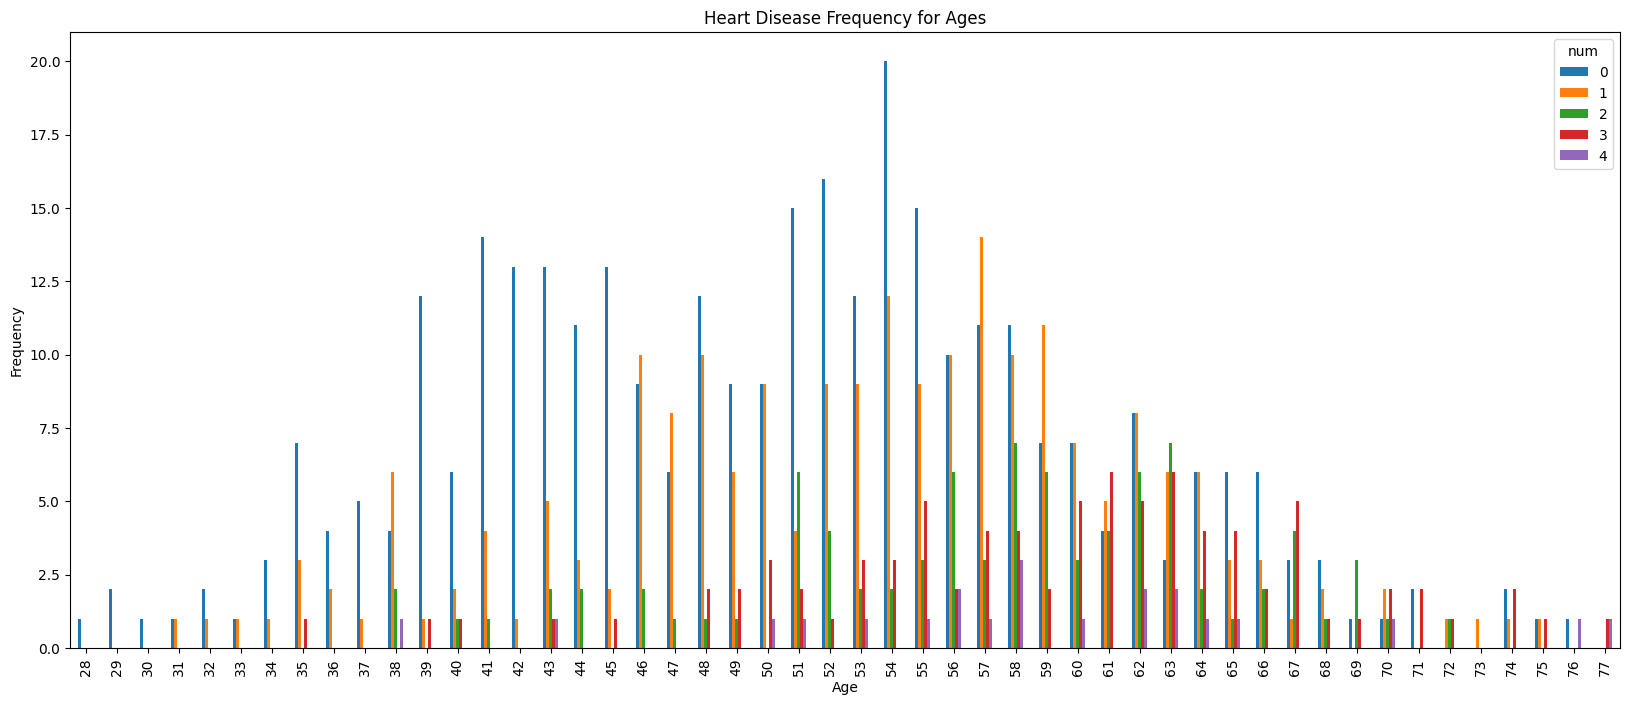

In [ ]:
pd.crosstab(df_heart_train.age,df_heart_train.num).plot(kind="bar",figsize=(20,8))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')  ## kategori usia
plt.show()

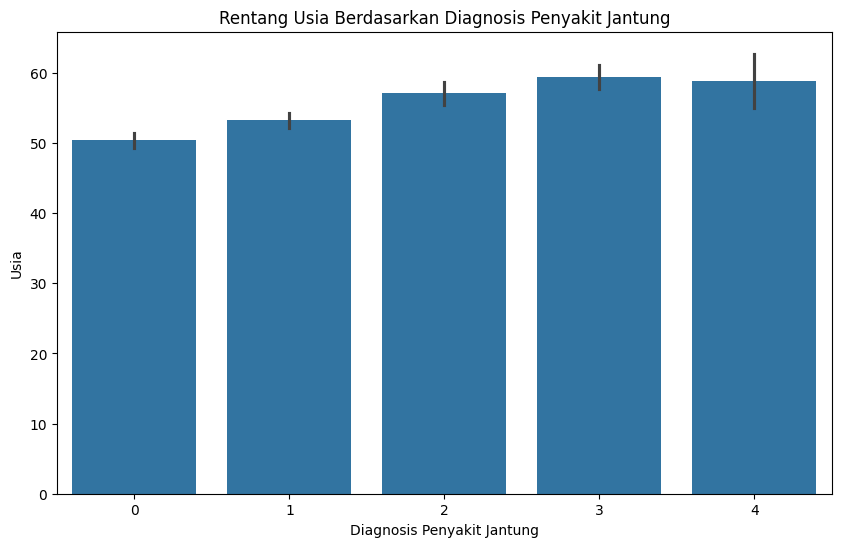

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='num', y='age', data=df_heart_train)
plt.title('Rentang Usia Berdasarkan Diagnosis Penyakit Jantung')
plt.xlabel('Diagnosis Penyakit Jantung')
plt.ylabel('Usia')
plt.show()


In [ ]:
for i in df_heart_train.columns:
    print(i,":",df_heart_train[i].nunique())

age : 50
sex : 2
dataset : 4
cp : 4
trestbps : 50
chol : 192
fbs : 2
restecg : 3
thalch : 116
exang : 2
oldpeak : 52
slope : 3
ca : 4
thal : 3
num : 5


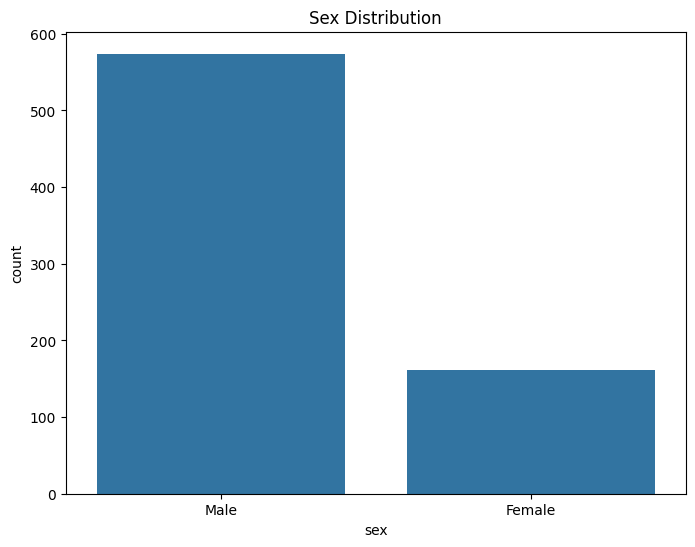

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='sex',data=df_heart_train)
plt.title('Sex Distribution')
plt.show()

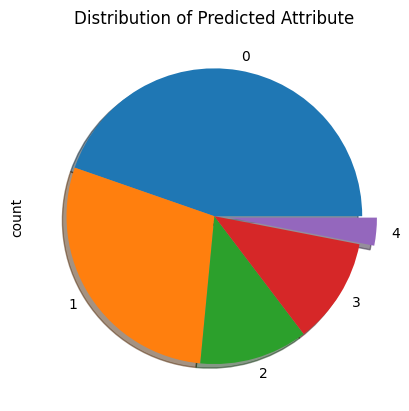

In [ ]:
df_heart['num'].value_counts().plot(kind='pie',explode=(0,0,0,0,0.1),shadow=True)
plt.title('Distribution of Predicted Attribute')
plt.show()

## Distribution of predicted outcomes across different regions

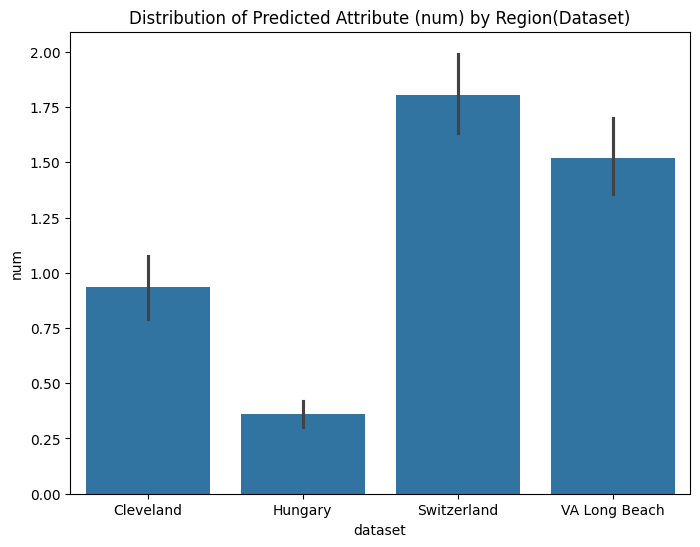

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='dataset',y='num',data=df_heart)
plt.title('Distribution of Predicted Attribute (num) by Region(Dataset)')
plt.show()

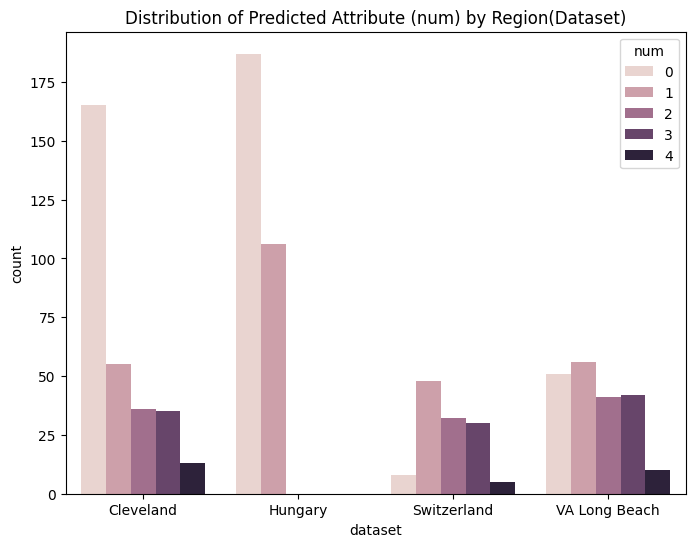

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='dataset',hue='num',data=df_heart)
plt.title('Distribution of Predicted Attribute (num) by Region(Dataset)')
plt.show()

## Distribution of thalassemia types varies across different regions

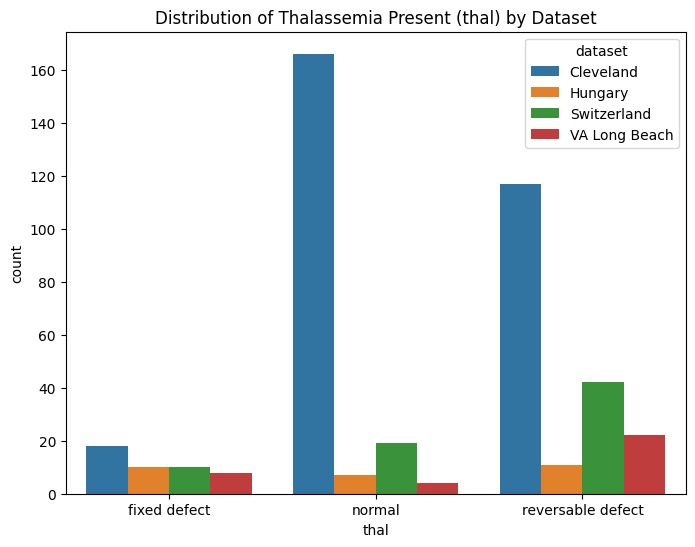

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='thal', hue='dataset', data=df_heart)
plt.title('Distribution of Thalassemia Present (thal) by Dataset')
plt.show()

## Distribution of restecg results varies across different regions

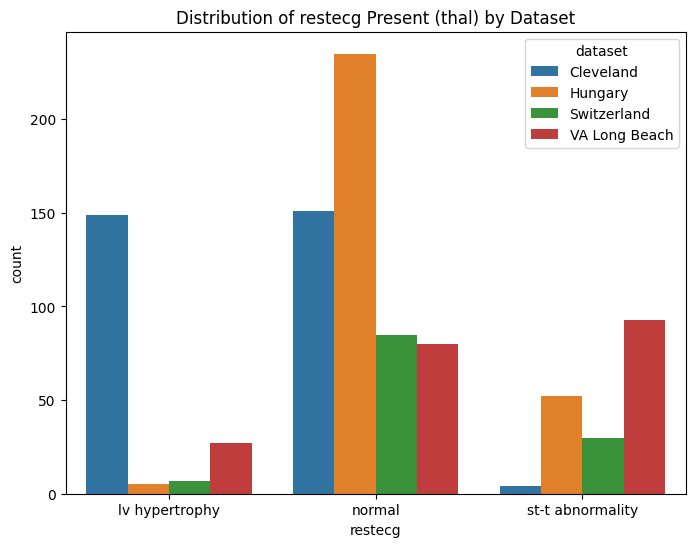

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='restecg', hue='dataset', data=df_heart)
plt.title('Distribution of restecg Present (thal) by Dataset')
plt.show()

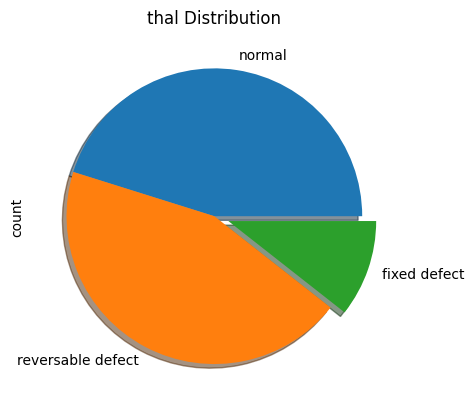

In [ ]:
df_heart['thal'].value_counts().plot(kind='pie',explode=(0,0,0.1),shadow=True)
plt.title('thal Distribution')
plt.show()

## Distribution of thalassemia types across different predicted outcomes related to heart disease

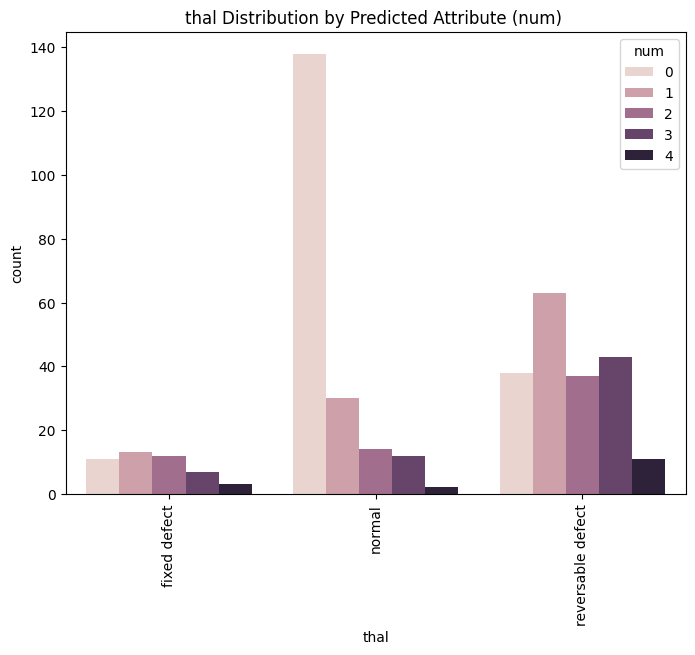

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='thal',hue='num',data=df_heart)
plt.xticks(rotation=90)
plt.title('thal Distribution by Predicted Attribute (num) ')
plt.show()

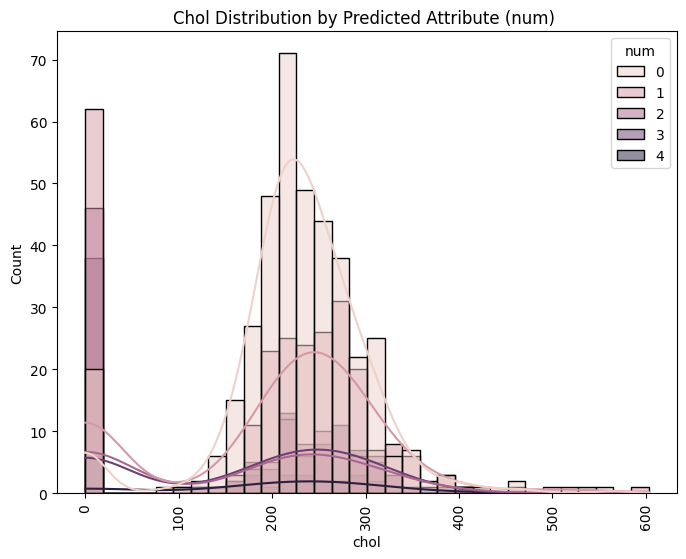

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(x='chol',hue='num',data=df_heart,kde=True)
plt.xticks(rotation=90)
plt.title('Chol Distribution by Predicted Attribute (num) ')
plt.show()

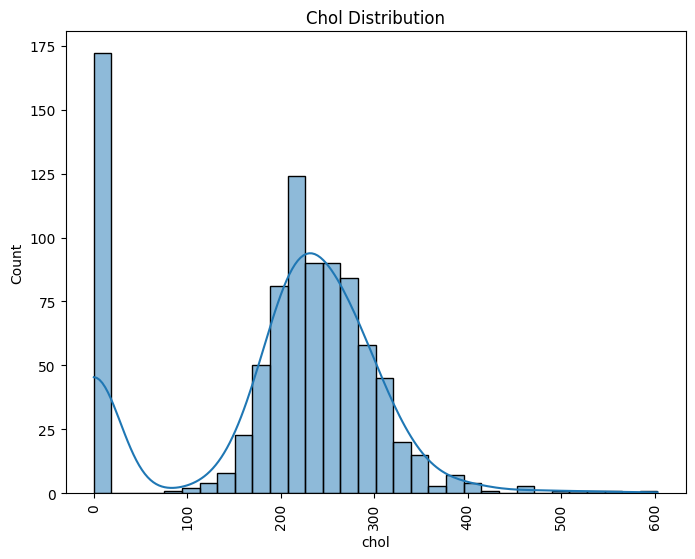

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(x='chol',data=df_heart,kde=True)
plt.xticks(rotation=90)
plt.title('Chol Distribution')
plt.show()

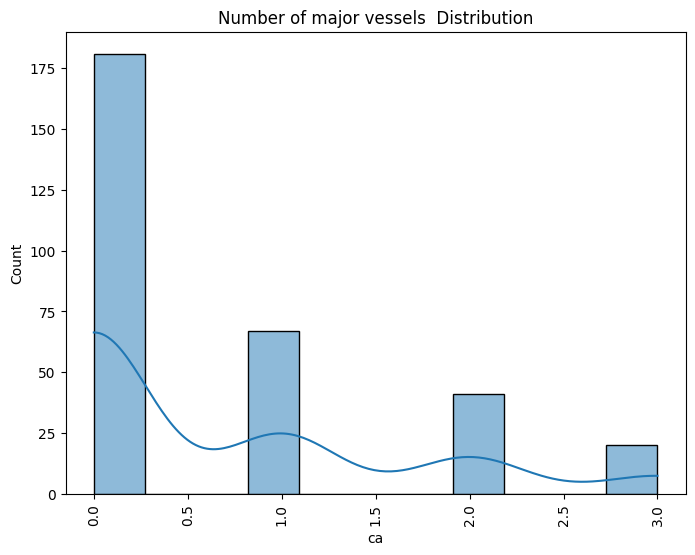

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(x='ca',data=df_heart,kde=True)
plt.xticks(rotation=90)
plt.title('Number of major vessels  Distribution')
plt.show()

## Distribution of predicted outcomes related to heart disease across different genders

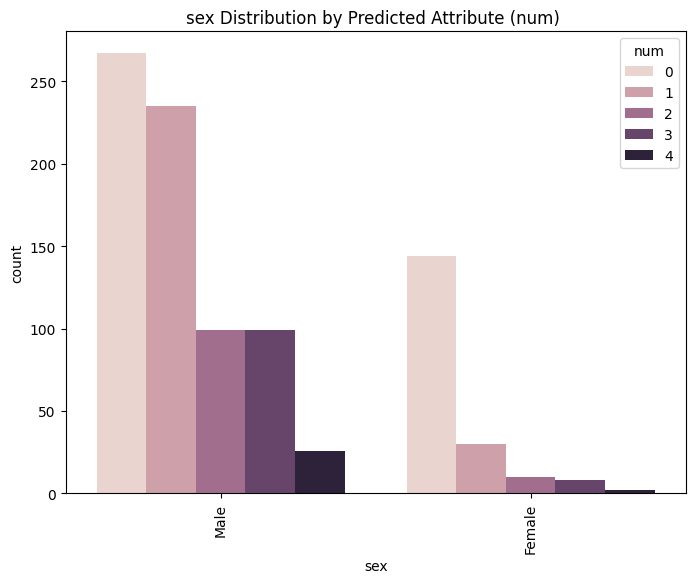

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='sex',hue='num',data=df_heart)
plt.xticks(rotation=90)
plt.title('sex Distribution by Predicted Attribute (num) ')
plt.show()

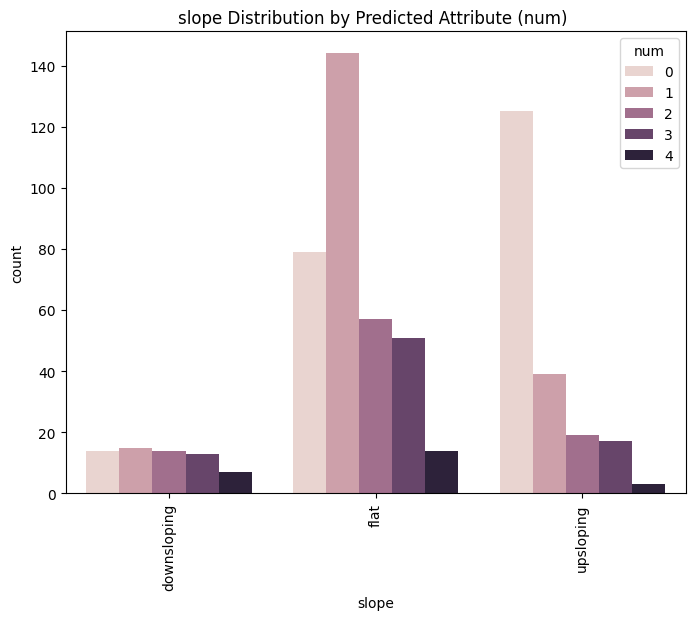

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='slope',hue='num',data=df_heart)
plt.xticks(rotation=90)
plt.title('slope Distribution by Predicted Attribute (num) ')
plt.show()

## Korelasi Fitur

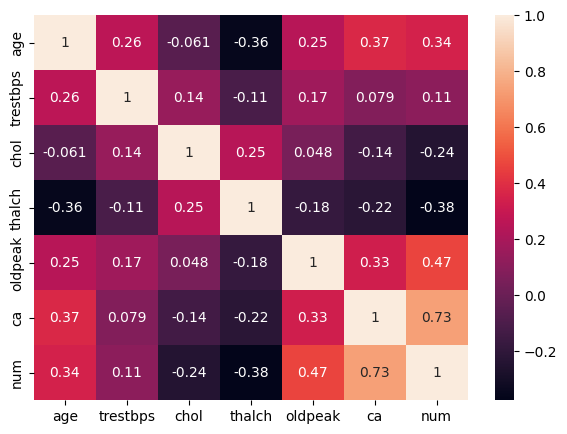

In [ ]:
# Heatmap
plt.figure(figsize = (7, 5))
sns.heatmap(df_heart_train[numerical_cols].corr(), annot = True)
plt.show()

# Preprocessing

In [ ]:
# Memilih fitur numerik yang akan digunakan
select_num = ['age', 'oldpeak', 'ca']
select_cat = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

## One Hot-Encoding

In [ ]:
# Split data numerik dan data kategorikal
num_train, cat_train, label_train = df_heart_train[select_num], df_heart_train[select_cat], df_heart_train['num']
num_test, cat_test, label_test = df_heart_test[select_num], df_heart_test[select_cat], df_heart_test['num']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# One Hot Encoder untuk data kategorikal
encoder = OneHotEncoder(sparse_output=False, drop='first')
cat_train = encoder.fit_transform(cat_train)
cat_test = encoder.transform(cat_test)
feature_names = encoder.get_feature_names_out()

# Feature scaling menggunakan MinMaxScaler
sc = MinMaxScaler()
num_train = sc.fit_transform(num_train)
num_test = sc.transform(num_test)

# Ubah dalam bentuk dataframe
num_train = pd.DataFrame(num_train, columns=select_num)
num_test = pd.DataFrame(num_test, columns=select_num)
cat_train = pd.DataFrame(cat_train, columns=feature_names)
cat_test = pd.DataFrame(cat_test, columns=feature_names)

# Gabungkan dengan data numerik dan kategorikal
df_heart_train_1 = pd.concat([num_train, cat_train, label_train], axis=1)
df_heart_test_1 = pd.concat([num_test, cat_test, label_test], axis=1)

In [ ]:
X_train, y_train = df_heart_train_1.drop('num', axis=1).values, df_heart_train_1['num'].values
X_test, y_test = df_heart_test_1.drop('num', axis=1).values, df_heart_test_1['num'].values

# SMOTE

In [ ]:
# Mencek jumlah kelas di setiap split dataset
print("y_train [0 1 2 3 4] :", np.bincount(y_train))
print("y_test  [0 1 2 3 4] :", np.bincount(y_test))

y_train [0 1 2 3 4] : [329 212  87  86  22]
y_test  [0 1 2 3 4] : [82 53 22 21  6]


In [ ]:
# prompt: ubah code di bawah ini menjadi smote yang dapat dilakukan setting pada tiap kelasnya

import numpy as np
from imblearn.over_sampling import SMOTE

# SMOTE with class-specific settings
smote = SMOTE(sampling_strategy={1: 265, 2: 255, 3: 250, 4: 170}, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
# Mencek jumlah kelas di setiap split dataset
print("y_train [0 1 2 3 4] :", np.bincount(y_train))
print("y_test  [0 1 2 3 4] :", np.bincount(y_test))


y_train [0 1 2 3 4] : [329 265 255 250 170]
y_test  [0 1 2 3 4] : [82 53 22 21  6]


# Modeling

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X, y, title):
  # Prediksi menggunakan model
  y_predict = model.predict(X)

  # Menghitung metrik performa model
  scores = {}
  scores['accuracy'] = accuracy_score(y, y_predict)
  scores['precision'] = precision_score(y, y_predict, average='macro')
  scores['recall'] = recall_score(y, y_predict, average='macro')
  scores['f1'] = f1_score(y, y_predict, average='macro')
  scores = {key: f'{value:.2%}' for key, value in scores.items()}

  report = classification_report(y, y_predict)

  # Confusion matrix
  conf_mat = confusion_matrix(y, y_predict)
  displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
  displ.plot()

  return scores, report

In [ ]:
scores_train = {}
scores_test = {}

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=200, n_jobs=-1,
                       random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       1.00      0.99      0.99       265
           2       1.00      1.00      1.00       255
           3       1.00      1.00      1.00       250
           4       1.00      1.00      1.00       170

    accuracy                           1.00      1269
   macro avg       1.00      1.00      1.00      1269
weighted avg       1.00      1.00      1.00      1269



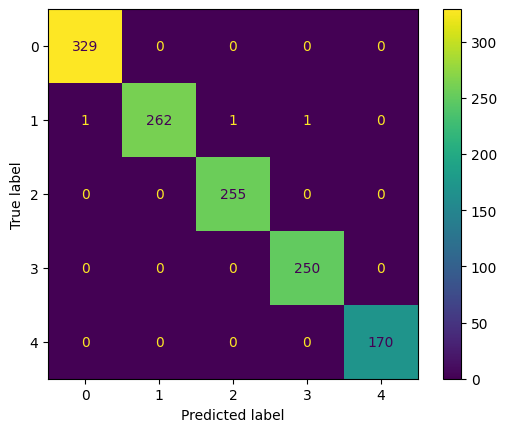

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

scores_train['random_forest'], report = evaluate_model(rf_model, X_train, y_train, title='Train')
print(report)

# Train

# Test

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        82
           1       0.90      0.83      0.86        53
           2       0.68      0.68      0.68        22
           3       0.68      0.90      0.78        21
           4       0.40      0.33      0.36         6

    accuracy                           0.85       184
   macro avg       0.72      0.74      0.73       184
weighted avg       0.86      0.85      0.85       184



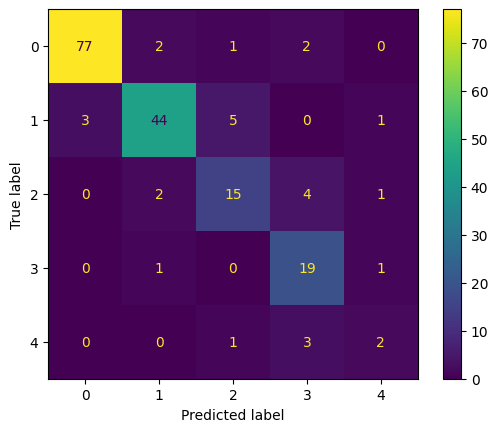

In [ ]:
scores_test['random_forest'], report = evaluate_model(rf_model, X_test, y_test, title='Test')
print(report)

# SVM

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', degree=2, gamma=1, C=4)
svm_model.fit(X_train, y_train)

SVC(C=4, degree=2, gamma=1)

# Train

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       329
           1       0.98      0.93      0.95       265
           2       0.96      0.98      0.97       255
           3       0.96      0.97      0.96       250
           4       0.94      0.96      0.95       170

    accuracy                           0.96      1269
   macro avg       0.96      0.96      0.96      1269
weighted avg       0.96      0.96      0.96      1269



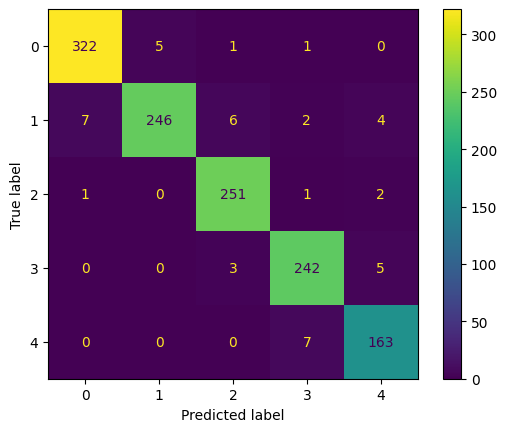

In [ ]:
scores_train['svm'], report = evaluate_model(svm_model, X_train, y_train, title='Train')
print(report)

# Test

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        82
           1       0.88      0.85      0.87        53
           2       0.67      0.73      0.70        22
           3       0.60      0.57      0.59        21
           4       0.29      0.33      0.31         6

    accuracy                           0.83       184
   macro avg       0.67      0.68      0.68       184
weighted avg       0.83      0.83      0.83       184



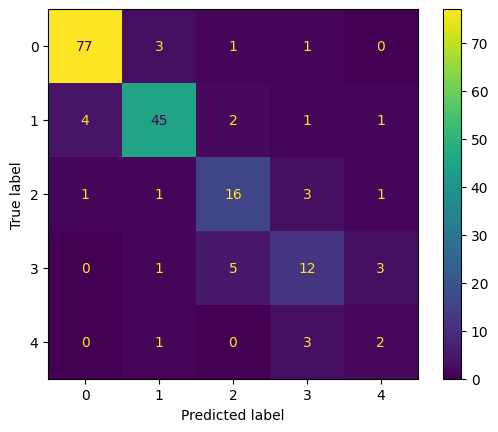

In [ ]:
scores_test['svm'], report = evaluate_model(svm_model, X_test, y_test, title='Test')
print(report)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=1, penalty='l2', n_jobs=-1)
lr_model.fit(X_train, y_train)

LogisticRegression(C=1, n_jobs=-1)

# Train

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       329
           1       0.82      0.82      0.82       265
           2       0.77      0.75      0.76       255
           3       0.67      0.69      0.68       250
           4       0.62      0.60      0.61       170

    accuracy                           0.78      1269
   macro avg       0.76      0.76      0.76      1269
weighted avg       0.78      0.78      0.78      1269



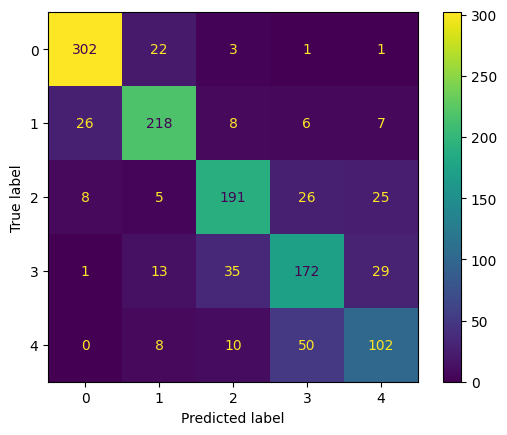

In [ ]:
scores_train['logistic_regression'], report = evaluate_model(lr_model, X_train, y_train, title='Train')
print(report)

# Test

              precision    recall  f1-score   support

           0       0.99      0.94      0.96        82
           1       0.92      0.87      0.89        53
           2       0.69      0.50      0.58        22
           3       0.45      0.67      0.54        21
           4       0.11      0.17      0.13         6

    accuracy                           0.81       184
   macro avg       0.63      0.63      0.62       184
weighted avg       0.84      0.81      0.82       184



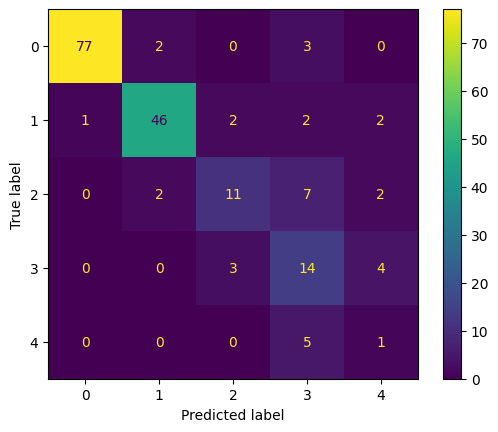

In [ ]:
scores_test['logistic_regression'], report = evaluate_model(lr_model, X_test, y_test, title='Test')
print(report)

# CatBoost

In [ ]:
# prompt: buatkan modeling seperti di atas menggunakan Catboost

!pip install catboost
from catboost import CatBoostClassifier

# CatBoost
catboost_model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='MultiClass', random_seed=42)
catboost_model.fit(X_train, y_train)


0:	learn: 1.4460504	total: 15.6ms	remaining: 1.54s
1:	learn: 1.3175848	total: 23.1ms	remaining: 1.13s
2:	learn: 1.2163910	total: 30.7ms	remaining: 993ms
3:	learn: 1.1266213	total: 37.6ms	remaining: 902ms
4:	learn: 1.0571639	total: 44.6ms	remaining: 848ms
5:	learn: 0.9954964	total: 51.1ms	remaining: 801ms
6:	learn: 0.9439513	total: 57.5ms	remaining: 764ms
7:	learn: 0.8927552	total: 63.8ms	remaining: 734ms
8:	learn: 0.8523951	total: 70ms	remaining: 708ms
9:	learn: 0.8178426	total: 77.2ms	remaining: 695ms
10:	learn: 0.7902618	total: 86.3ms	remaining: 699ms
11:	learn: 0.7659103	total: 93.2ms	remaining: 684ms
12:	learn: 0.7416005	total: 99.8ms	remaining: 668ms
13:	learn: 0.7229673	total: 107ms	remaining: 660ms
14:	learn: 0.7023784	total: 114ms	remaining: 646ms
15:	learn: 0.6858113	total: 121ms	remaining: 635ms
16:	learn: 0.6682385	total: 129ms	remaining: 630ms
17:	learn: 0.6542667	total: 136ms	remaining: 617ms
18:	learn: 0.6355742	total: 142ms	remaining: 606ms
19:	learn: 0.6228815	total: 14

# Train

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       329
           1       0.90      0.89      0.90       265
           2       0.90      0.96      0.93       255
           3       0.93      0.90      0.92       250
           4       0.93      0.93      0.93       170

    accuracy                           0.93      1269
   macro avg       0.93      0.93      0.92      1269
weighted avg       0.93      0.93      0.93      1269



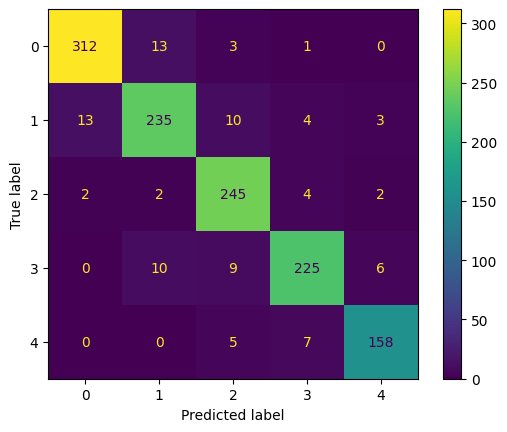

In [ ]:
# Train
scores_train['catboost'], report = evaluate_model(catboost_model, X_train, y_train, title='Train')
print(report)

# Test

              precision    recall  f1-score   support

           0       0.99      0.94      0.96        82
           1       0.90      0.83      0.86        53
           2       0.60      0.68      0.64        22
           3       0.64      0.76      0.70        21
           4       0.29      0.33      0.31         6

    accuracy                           0.84       184
   macro avg       0.68      0.71      0.69       184
weighted avg       0.85      0.84      0.84       184



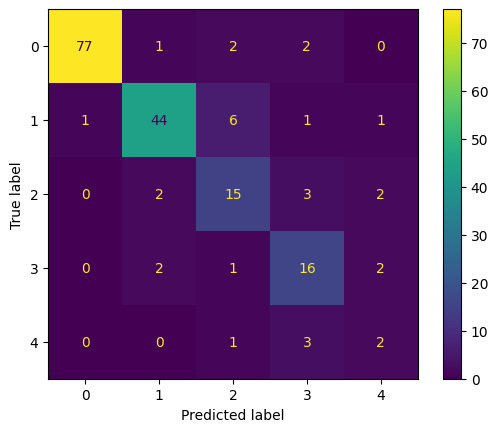

In [ ]:
# Test
scores_test['catboost'], report = evaluate_model(catboost_model, X_test, y_test, title='Test')
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       0.99      1.00      0.99       265
           2       1.00      1.00      1.00       255
           3       1.00      1.00      1.00       250
           4       1.00      1.00      1.00       170

    accuracy                           1.00      1269
   macro avg       1.00      1.00      1.00      1269
weighted avg       1.00      1.00      1.00      1269

              precision    recall  f1-score   support

           0       0.96      0.89      0.92        82
           1       0.84      0.81      0.83        53
           2       0.62      0.68      0.65        22
           3       0.69      0.86      0.77        21
           4       0.29      0.33      0.31         6

    accuracy                           0.82       184
   macro avg       0.68      0.71      0.70       184
weighted avg       0.83      0.82      0.83       184



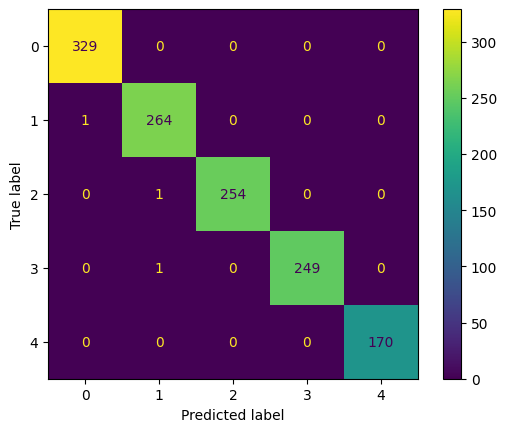

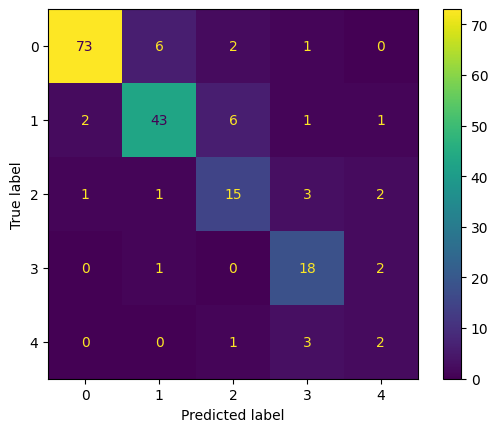

In [ ]:
!pip install xgboost

from xgboost import XGBClassifier

# XGBoost
xgb_model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, objective='multi:softmax', random_state=42)
xgb_model.fit(X_train, y_train)

# Train
scores_train['xgboost'], report = evaluate_model(xgb_model, X_train, y_train, title='Train')
print(report)

# Test
scores_test['xgboost'], report = evaluate_model(xgb_model, X_test, y_test, title='Test')
print(report)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 847
[LightGBM] [Info] Number of data points in the train set: 1269, number of used features: 18
[LightGBM] [Info] Start training from score -1.349927
[LightGBM] [Info] Start training from score -1.566255
[LightGBM] [Info] Start training from score -1.604721
[LightGBM] [Info] Start training from score -1.624524
[LightGBM] [Info] Start training from score -2.010186
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

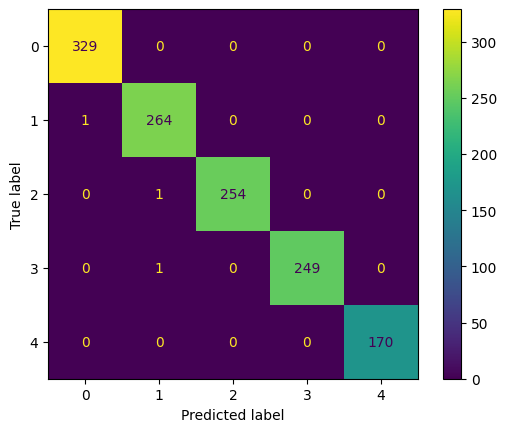

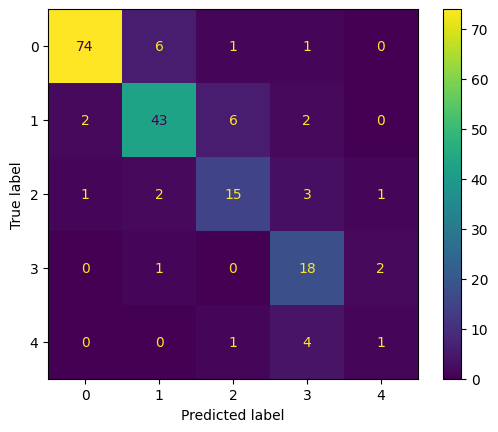

In [ ]:
!pip install lightgbm

from lightgbm import LGBMClassifier

# LightGBM
lgbm_model = LGBMClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, objective='multiclass', random_state=42)
lgbm_model.fit(X_train, y_train)

# Train
scores_train['lightgbm'], report = evaluate_model(lgbm_model, X_train, y_train, title='Train')
print(report)

# Test
scores_test['lightgbm'], report = evaluate_model(lgbm_model, X_test, y_test, title='Test')
print(report)


0:	learn: 1.4460504	total: 18.2ms	remaining: 1.8s
1:	learn: 1.3175848	total: 42.1ms	remaining: 2.06s
2:	learn: 1.2163910	total: 67.1ms	remaining: 2.17s
3:	learn: 1.1266213	total: 84.4ms	remaining: 2.02s
4:	learn: 1.0571639	total: 103ms	remaining: 1.95s
5:	learn: 0.9954964	total: 126ms	remaining: 1.97s
6:	learn: 0.9439513	total: 144ms	remaining: 1.91s
7:	learn: 0.8927552	total: 158ms	remaining: 1.82s
8:	learn: 0.8523951	total: 179ms	remaining: 1.81s
9:	learn: 0.8178426	total: 196ms	remaining: 1.77s
10:	learn: 0.7902618	total: 216ms	remaining: 1.75s
11:	learn: 0.7659103	total: 236ms	remaining: 1.73s
12:	learn: 0.7416005	total: 253ms	remaining: 1.69s
13:	learn: 0.7229673	total: 267ms	remaining: 1.64s
14:	learn: 0.7023784	total: 281ms	remaining: 1.59s
15:	learn: 0.6858113	total: 299ms	remaining: 1.57s
16:	learn: 0.6682385	total: 317ms	remaining: 1.55s
17:	learn: 0.6542667	total: 340ms	remaining: 1.55s
18:	learn: 0.6355742	total: 358ms	remaining: 1.53s
19:	learn: 0.6228815	total: 374ms	rema

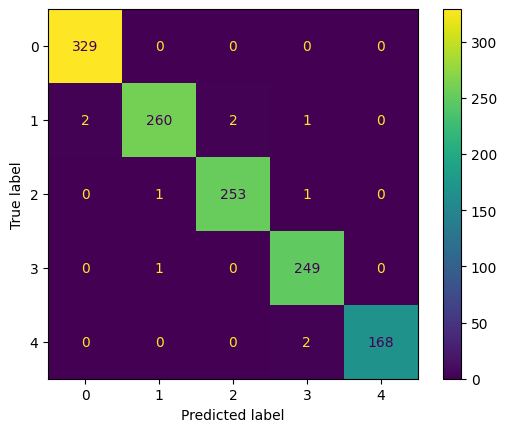

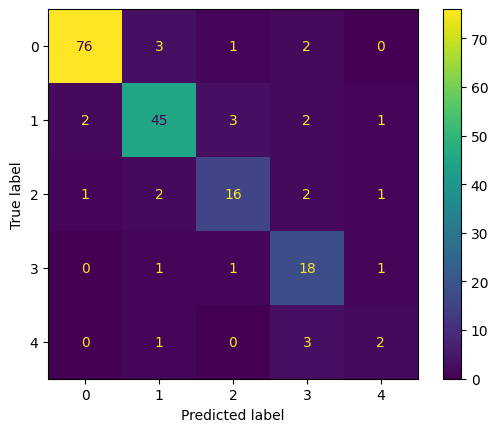

In [ ]:
# prompt: buatkan model stacking seperti model yang sebelumnya

from sklearn.ensemble import StackingClassifier

# Define the base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=20, n_jobs=-1, random_state=42)),
    ('svm', SVC(kernel='rbf', degree=2, gamma=1, C=4, probability=True)),
    ('lr', LogisticRegression(C=1, penalty='l2', n_jobs=-1)),
    ('catboost', CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='MultiClass', random_seed=42)),
    ('xgboost', XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, objective='multi:softmax', random_state=42)),
    ('lightgbm', LGBMClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, objective='multiclass', random_state=42))
]

# Define the meta-model
meta_model = LogisticRegression()

# Create the stacking classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Evaluate the stacking model
scores_train['stacking'], report = evaluate_model(stacking_model, X_train, y_train, title='Train')
print(report)

scores_test['stacking'], report = evaluate_model(stacking_model, X_test, y_test, title='Test')
print(report)


# Clasiffication Report

In [ ]:
train_df = pd.DataFrame(scores_train)
test_df = pd.DataFrame(scores_test)
train_df.index = train_df.index + '_train'
test_df.index = test_df.index + '_test'
results_df = pd.concat([train_df, test_df], axis=0, ignore_index=False)
results_df = results_df.transpose()
results_df = results_df.sort_values('accuracy_test', ascending=False)
results_df

,accuracy_train,precision_train,recall_train,f1_train,accuracy_test,precision_test,recall_test,f1_test
random_forest,99.76%,99.78%,99.77%,99.78%,85.33%,72.42%,73.78%,72.69%
stacking,99.21%,99.25%,99.15%,99.20%,85.33%,73.12%,73.87%,73.18%
catboost,92.59%,92.54%,92.51%,92.50%,83.70%,68.22%,70.93%,69.34%
svm,96.45%,96.22%,96.36%,96.27%,82.61%,67.48%,68.40%,67.86%
xgboost,99.76%,99.79%,99.77%,99.78%,82.07%,68.13%,71.48%,69.54%
lightgbm,99.76%,99.79%,99.77%,99.78%,82.07%,66.66%,68.39%,67.02%
logistic_regression,77.62%,75.71%,75.55%,75.62%,80.98%,63.15%,62.81%,62.13%


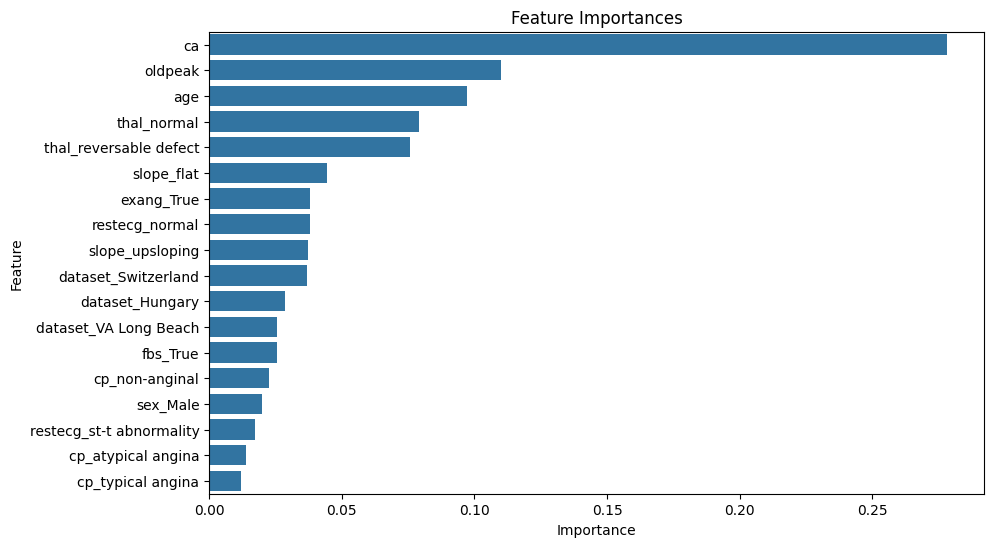

In [ ]:
# Get feature importances from the best model (in this case, Random Forest)
importances = rf_model.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importances = pd.DataFrame({'Feature': df_heart_train_1.drop('num', axis=1).columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()


# SAVE MODEL

In [ ]:
import joblib

# Save the model to a file
joblib.dump(rf_model, 'rf_model.joblib')

# Simpan scaler
joblib.dump(sc, 'scaler.joblib')

# Simpan scaler
joblib.dump(sc, 'scaler.joblib')


['scaler.joblib']

In [ ]:
# Load the model from the file
loaded_model = joblib.load('rf_model.joblib')

# Use the loaded model to make predictions
predictions = loaded_model.predict(X_test)
print(predictions)

[1 3 1 3 0 0 0 2 0 1 3 0 0 0 3 3 0 3 0 1 0 3 0 0 2 3 0 4 1 0 0 3 0 0 1 2 1
 2 0 1 2 2 3 0 3 1 3 0 1 0 0 0 0 0 1 0 1 0 0 0 0 2 0 3 0 2 1 1 0 0 1 4 0 3
 0 1 1 1 1 4 2 1 2 0 1 0 3 1 0 1 0 2 0 0 0 1 1 1 1 1 1 1 1 0 4 2 1 2 0 3 3
 0 0 3 1 2 3 0 0 1 0 1 0 0 0 2 0 1 1 0 0 0 0 0 3 1 3 0 1 0 4 0 0 0 1 0 0 0
 2 0 1 0 1 0 3 1 0 0 2 1 0 3 3 0 3 2 1 1 0 1 3 0 1 3 0 3 0 0 2 0 1 2 2 2]


In [ ]:
import numpy as np
import joblib
from tensorflow.keras.models import load_model

# Kelas untuk prediksi menggunakan ANN yang sudah dilatih
class HEART():
  def __init__ (self, loc_scaler, loc_model):
    self.heart_scaler = joblib.load(loc_scaler)
    self.heart_model = load_model(loc_model)

  def preprocessing(self, data):
    # Cap outlier
    if data[1] > 295:
      data[1] = 295
    # Normalisasi
    data_scaled = self.heart_scaler.transform([data])
    return data_scaled


  def klasifikasi(self, data):
    data_scaled = self.preprocessing(data)
    predicted_score = self.diabetes_model.predict(data_scaled, verbose=0)
    round_score = np.round(predicted_score)
    if round_score == 1:
      predicted_class = 'Diabetes'
    else:
      predicted_class = 'Sehat'
    return predicted_score[0][0], predicted_class